In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('visa_success_prediction_dataset.csv')

In [3]:
# Display basic information and first few rows
print("First few rows of the dataset:")
print(df.head())
print("\nData Information:")
print(df.info())
print("\nData Description:")
print(df.describe())

First few rows of the dataset:
           visa_type  age education_level  years_of_experience  \
0                H1B   34       Bachelors                   13   
1  Germany_Work_Visa   43       Bachelors                    8   
2                H1B   28       Bachelors                    6   
3  UK_Skilled_Worker   44       Bachelors                    2   
4  Germany_Work_Visa   42         Diploma                   11   

   salary_offered language_proficiency job_offer passport_validity  \
0          108605                Basic        No     Expiring_soon   
1           41974         Intermediate       Yes             Valid   
2          127666             Advanced       Yes             Valid   
3           93521                Basic       Yes             Valid   
4           35365             Advanced       Yes     Expiring_soon   

  previous_international_travel criminal_record family_in_country  \
0                            No             NaN               Yes   
1            

In [4]:
# Check for missing values
print("\nMissing Values in each column:")
print(df.isnull().sum())


Missing Values in each column:
visa_type                            0
age                                  0
education_level                      0
years_of_experience                  0
salary_offered                       0
language_proficiency                 0
job_offer                            0
passport_validity                    0
previous_international_travel        0
criminal_record                  22431
family_in_country                    0
financial_support                    0
h1b_specialty_occupation             0
germany_language_proficiency      2549
uk_salary_threshold                  0
outcome                              0
dtype: int64


In [5]:
# Handling missing values by filling or dropping (if necessary)
# Example: Fill missing numerical columns with the median and categorical with the mode
for column in df.select_dtypes(include=[np.number]):
    df[column].fillna(df[column].median(), inplace=True)

C:\Users\athin\AppData\Local\Temp\ipykernel_9936\619670651.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\athin\AppData\Local\Temp\ipykernel_9936\619670651.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [6]:
for column in df.select_dtypes(include=['object']):
    df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\athin\AppData\Local\Temp\ipykernel_9936\4043303271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [7]:
# Verify missing values are handled
print("\nMissing Values after handling:")
print(df.isnull().sum())


Missing Values after handling:
visa_type                        0
age                              0
education_level                  0
years_of_experience              0
salary_offered                   0
language_proficiency             0
job_offer                        0
passport_validity                0
previous_international_travel    0
criminal_record                  0
family_in_country                0
financial_support                0
h1b_specialty_occupation         0
germany_language_proficiency     0
uk_salary_threshold              0
outcome                          0
dtype: int64


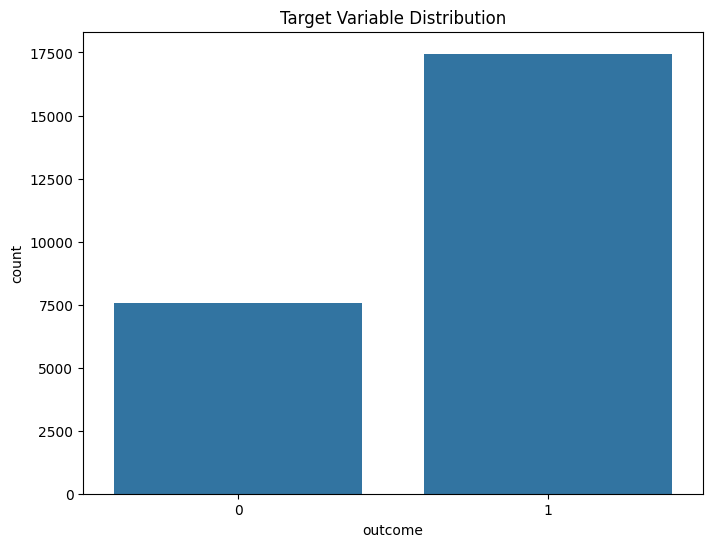

In [8]:
# Plot distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='outcome')  # Replace 'outcome' with actual target column name
plt.title('Target Variable Distribution')
plt.show()

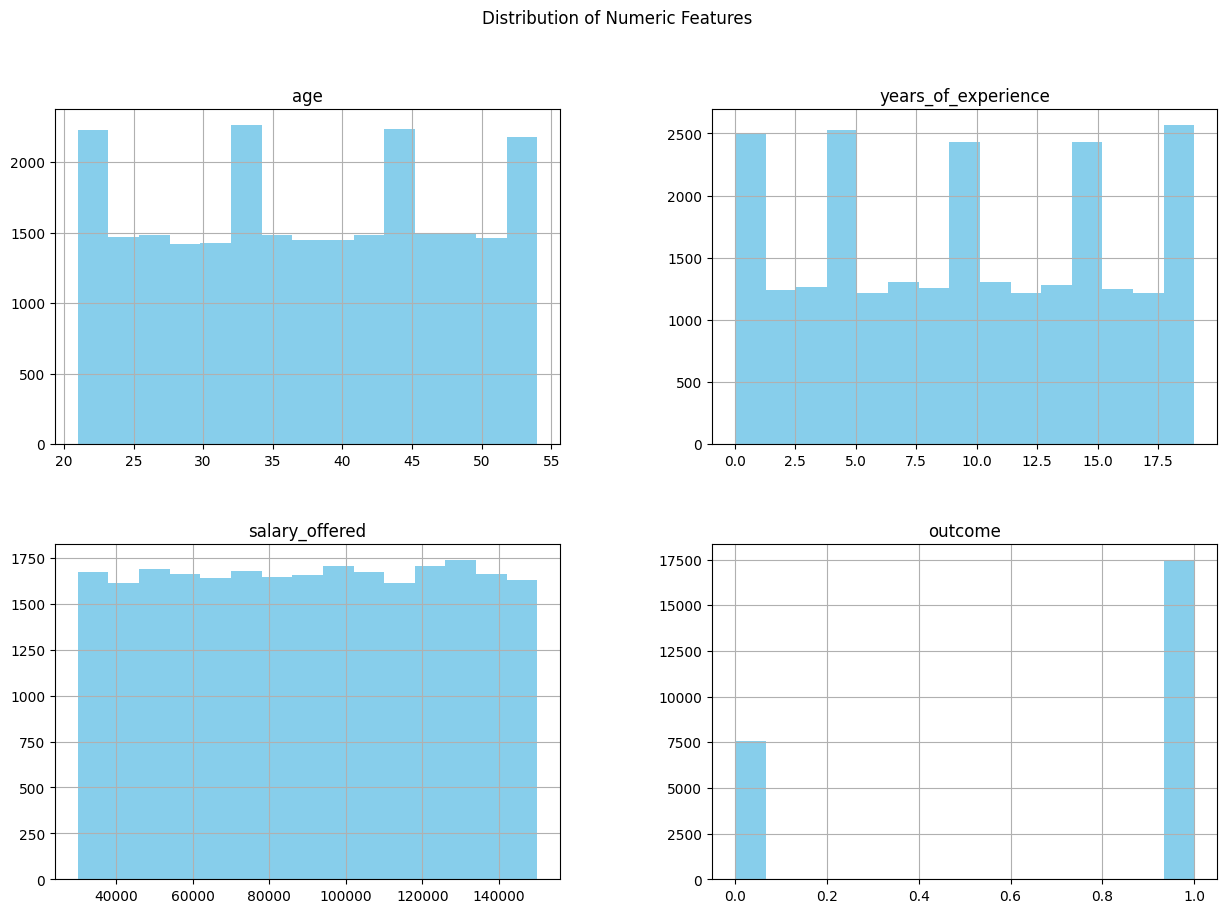

In [9]:
# Visualize distributions of numeric features
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns].hist(bins=15, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Numeric Features")
plt.show()

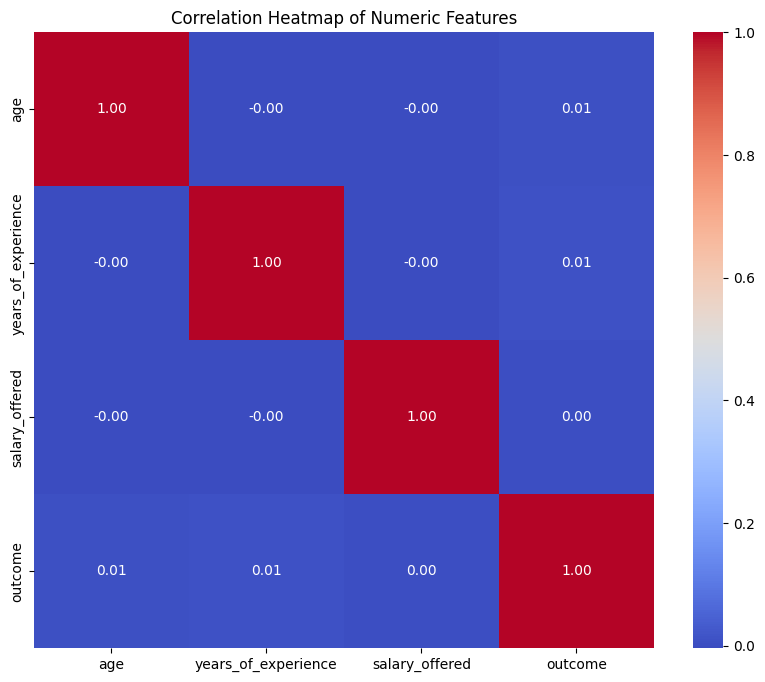

In [10]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap of only numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

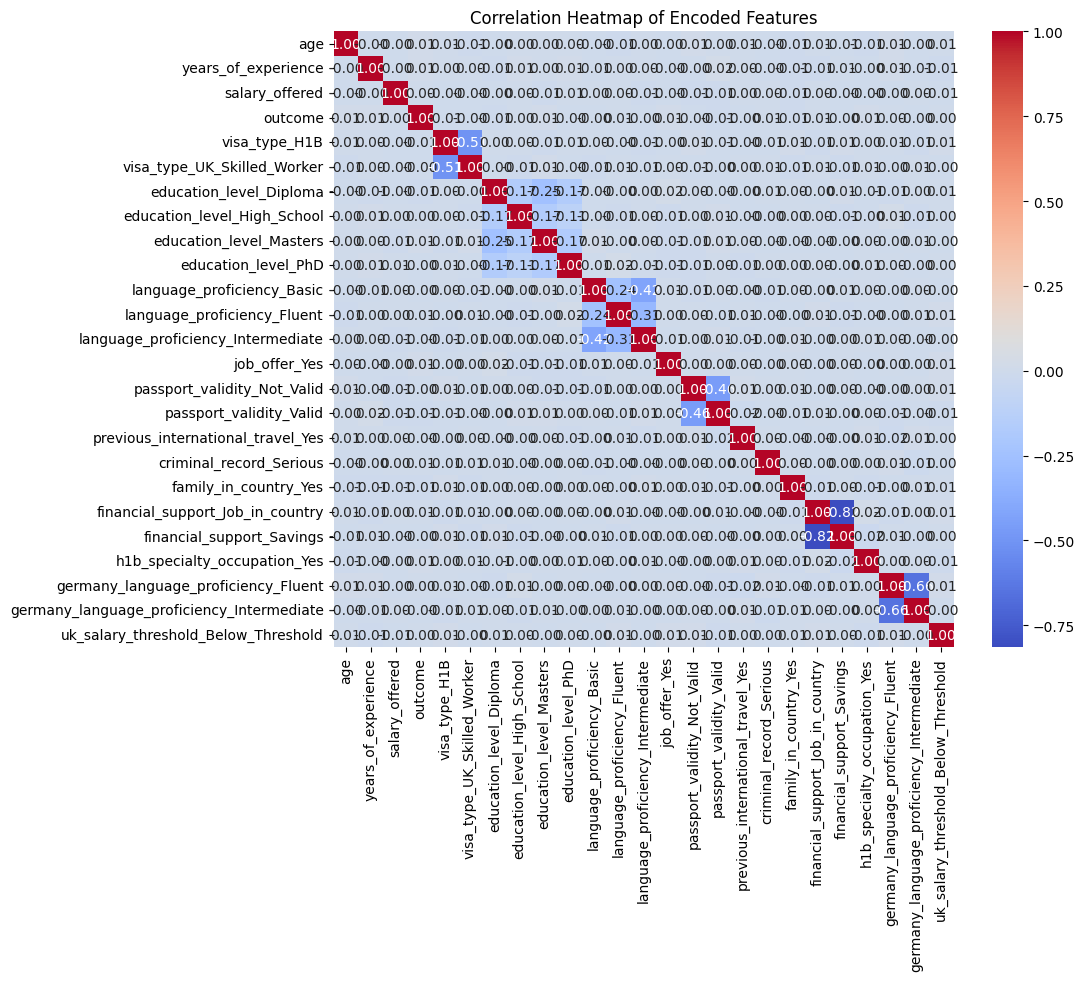

In [11]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation heatmap on the encoded dataframe
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

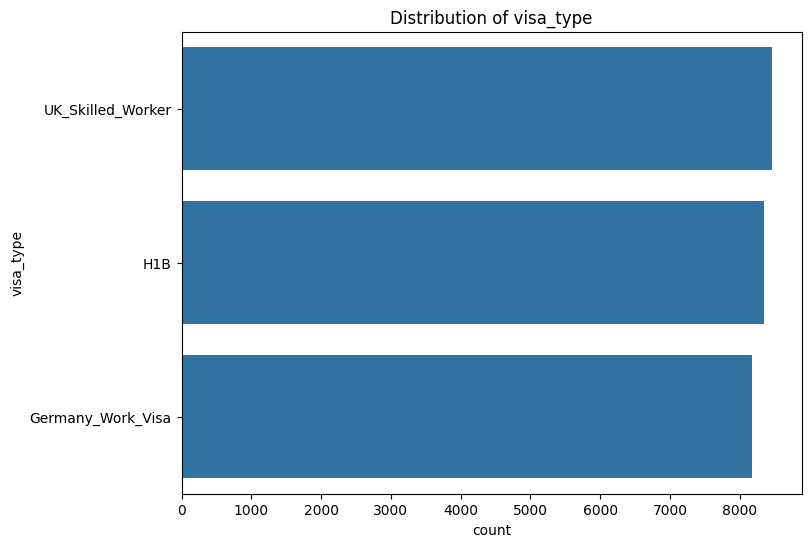

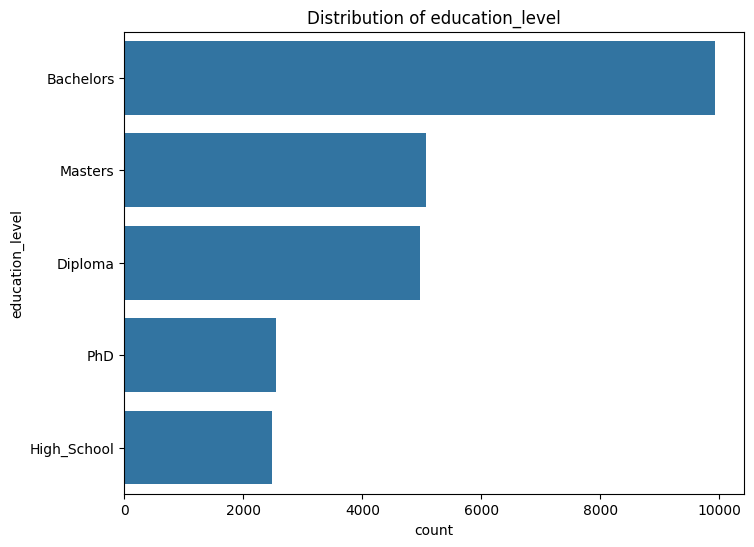

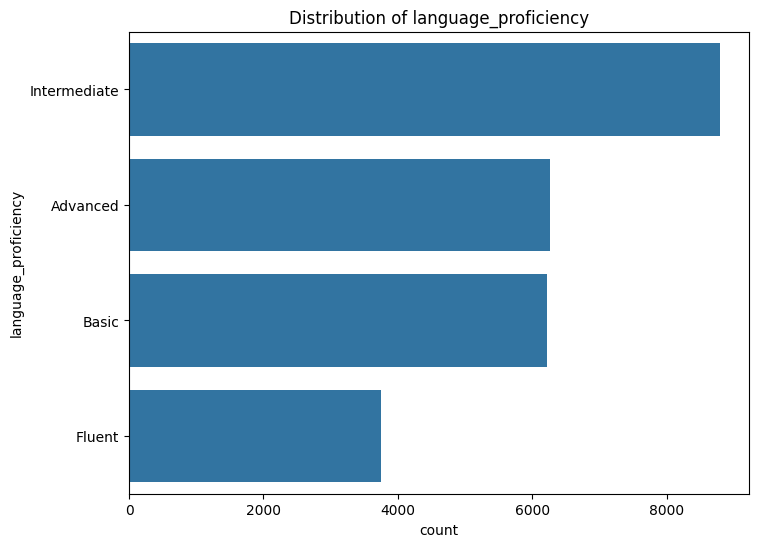

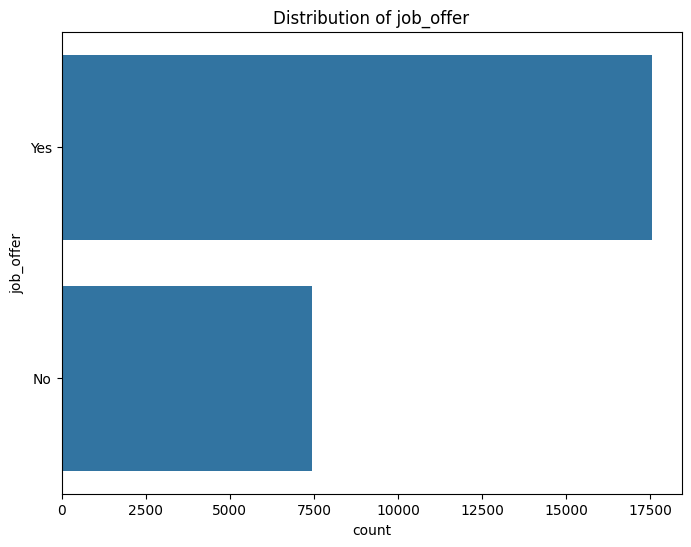

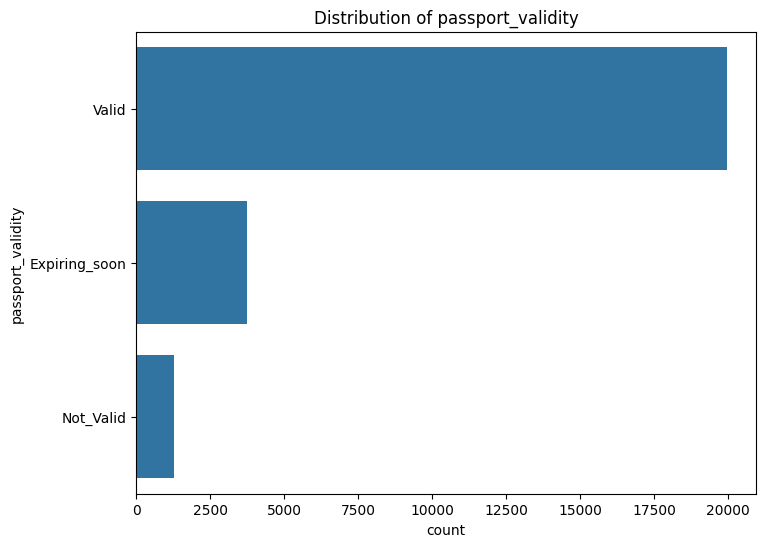

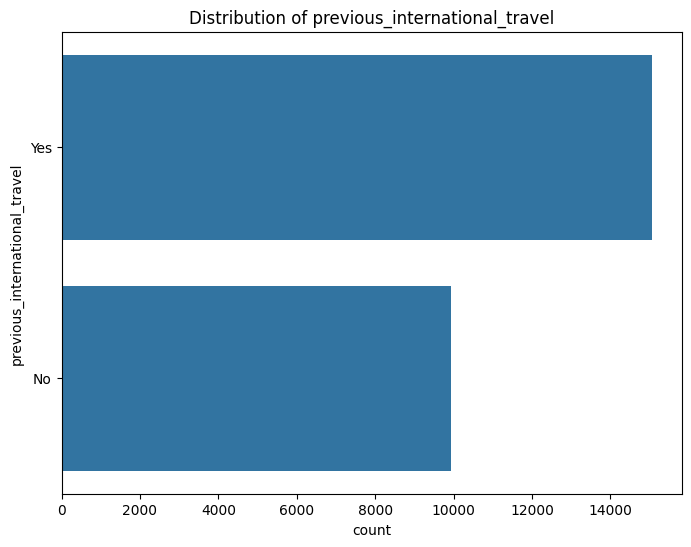

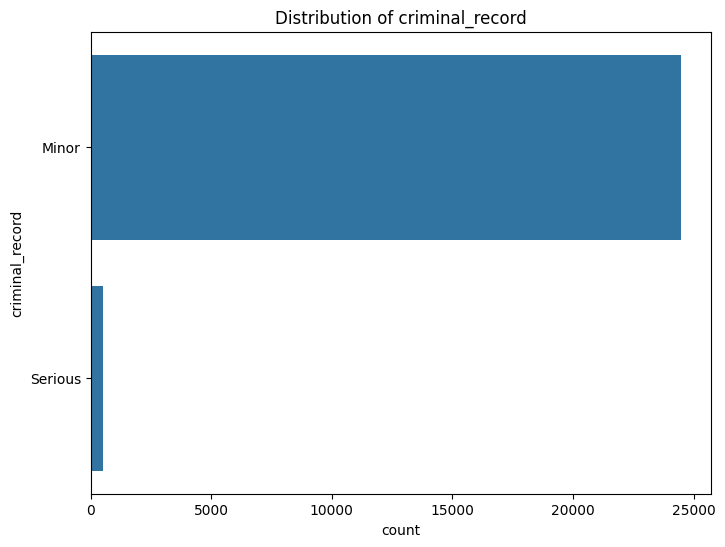

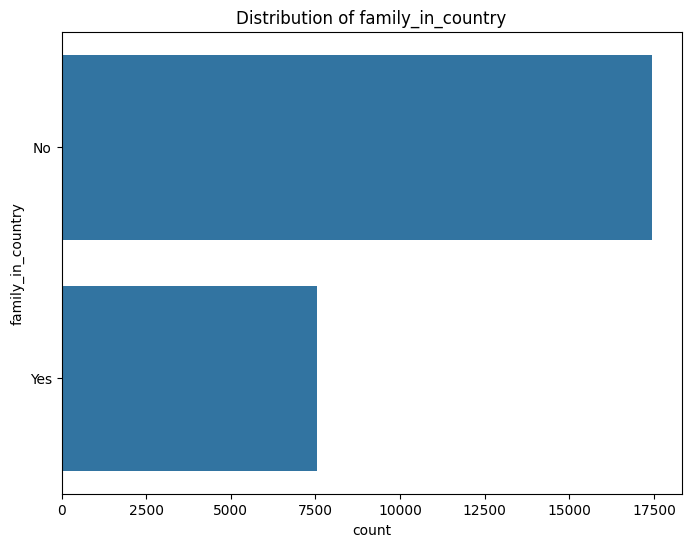

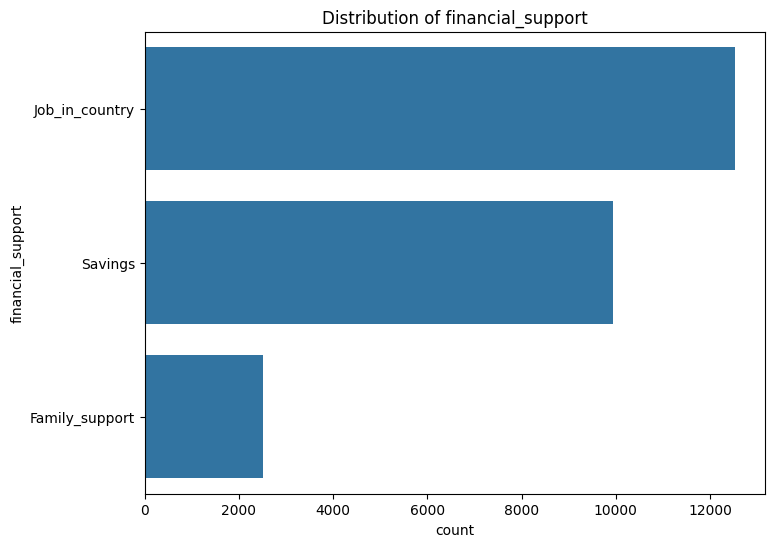

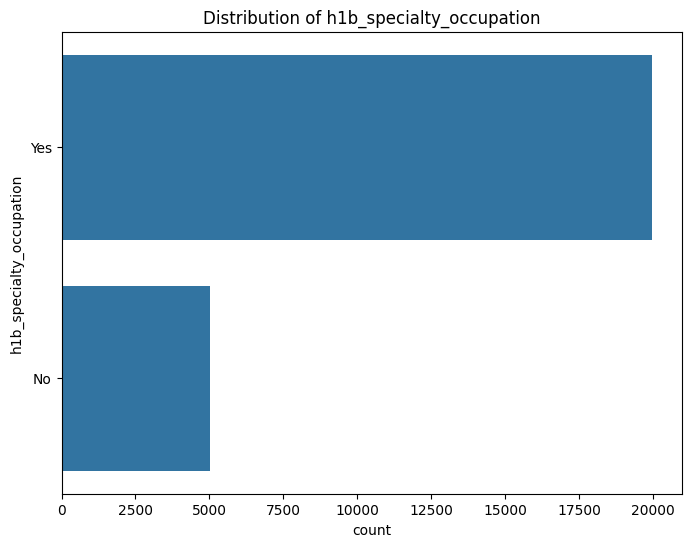

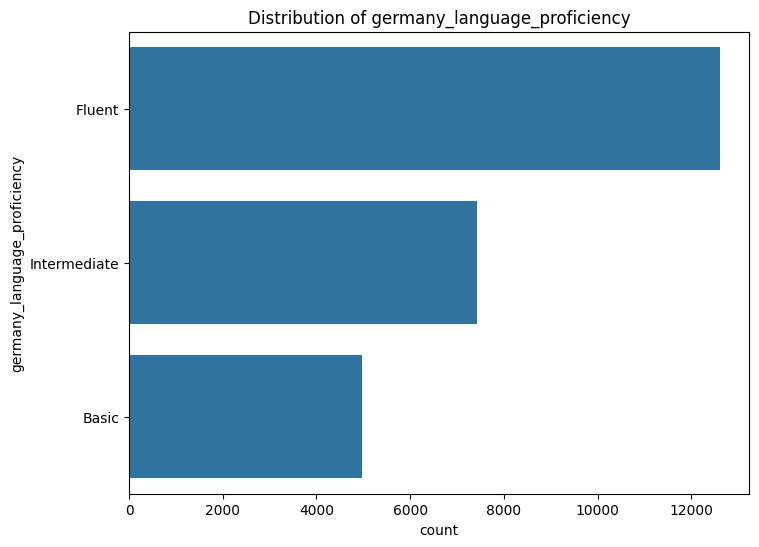

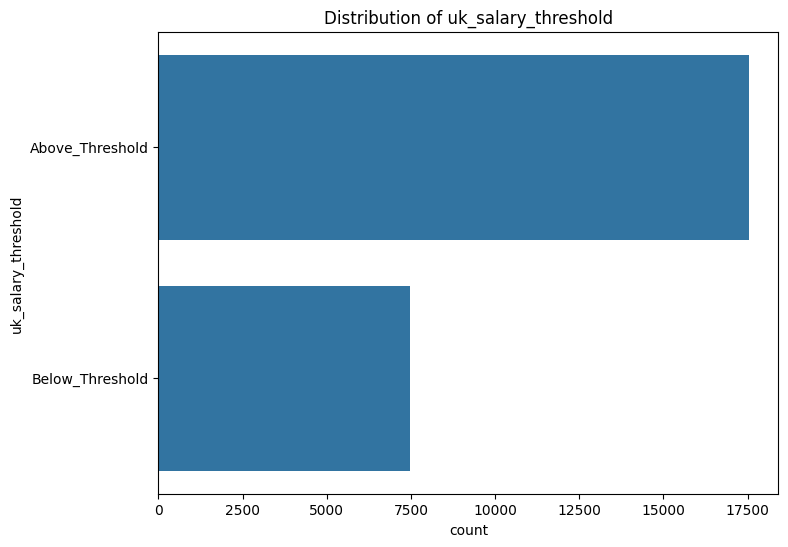

In [12]:
# Analyze categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, y=column, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()


In [13]:
# One-hot encode categorical variables for model use
df_encoded = pd.get_dummies(df, drop_first=True)

In [14]:
# Convert True/False values to 1/0
df = df.replace({True: 1, False: 0})

# Display the first few rows to verify the transformation
print(df.head())

           visa_type  age education_level  years_of_experience  \
0                H1B   34       Bachelors                   13   
1  Germany_Work_Visa   43       Bachelors                    8   
2                H1B   28       Bachelors                    6   
3  UK_Skilled_Worker   44       Bachelors                    2   
4  Germany_Work_Visa   42         Diploma                   11   

   salary_offered language_proficiency job_offer passport_validity  \
0          108605                Basic        No     Expiring_soon   
1           41974         Intermediate       Yes             Valid   
2          127666             Advanced       Yes             Valid   
3           93521                Basic       Yes             Valid   
4           35365             Advanced       Yes     Expiring_soon   

  previous_international_travel criminal_record family_in_country  \
0                            No           Minor               Yes   
1                           Yes           Mi

In [15]:

# Save the cleaned and transformed dataset
cleaned_path = 'visa_success_prediction_cleaned_dataset.csv'
df_encoded.to_csv(cleaned_path, index=False)
print(f"\nCleaned and encoded dataset saved to: {cleaned_path}")


Cleaned and encoded dataset saved to: visa_success_prediction_cleaned_dataset.csv
